In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

C:\Users\mikev\anaconda3\envs\dev\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mikev\anaconda3\envs\dev\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\mikev\anaconda3\envs\dev\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mikev\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()
api_key = os.getenv("news_api")
print(api_key)

6328236de8a042eba8425dcef7ff96dc


In [3]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
btc_news = newsapi.get_everything(q = "bitcoin", language = "en")
print(f"Total Results: {btc_news['totalResults']}")

eth_news = newsapi.get_everything(q = "ethereum", language = "en")
print(f"Total Results: {eth_news['totalResults']}")

doge_news = newsapi.get_everything(q = "dogecoin", language = "en")
print(f"Total Results: {doge_news['totalResults']}")

car_news = newsapi.get_everything(q = "cardano", language = "en")
print(f"Total Results: {car_news['totalResults']}")

pol_news = newsapi.get_everything(q = "polkadot", language = "en")
print(f"Total Results: {pol_news['totalResults']}")

link_news = newsapi.get_everything(q = "chainlink", language = "en")
print(f"Total Results: {link_news['totalResults']}")

Total Results: 10257
Total Results: 2659
Total Results: 1423
Total Results: 327
Total Results: 260
Total Results: 114


In [5]:
#Bitcoin
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:1]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    

btc_df = pd.DataFrame(btc_sentiments)
btc_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
btc_df = btc_df[btc_cols]
btc_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.8402,0.0,0.718,0.282,El Salvador's President Nayib Bukele has made ...
1,0.1280,0.0,0.957,0.043,El Salvador has become the first country in th...
2,0.6908,0.0,0.831,0.169,"It's all about clean energy, it seems. \r\nElo..."
3,0.2732,0.0,0.940,0.060,image captionThe move means bitcoin will be ac...
4,0.5574,0.0,0.893,0.107,"Several crypto fans that descended on Miami, F..."


In [6]:
#Ethereum
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
eth_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
eth_df = eth_df[eth_cols]
eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.000,0.000,1.000,0.0,TL;DR: The Cryptocurrency with Ethereum and So...
1,-0.296,0.061,0.939,0.0,It wasn't long ago that your average person ha...
2,0.000,0.000,1.000,0.0,A representation of virtual currency Ethereum ...
3,-0.340,0.066,0.934,0.0,This article was translated from our Spanish e...
4,0.000,0.000,1.000,0.0,This new mining feature is called 'Norton Cryp...


In [7]:
#Cardano
car_sentiments = []

for article in car_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        car_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
car_df = pd.DataFrame(car_sentiments)
car_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
car_df = car_df[car_cols]
car_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,A representation of virtual currency Bitcoin i...
1,0.1027,0.061,0.866,0.073,Opinions expressed by Entrepreneur contributor...
2,0.1779,0.000,0.948,0.052,INA FASSBENDER/AFP via Getty Images\r\nInvesto...
3,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...
4,0.2716,0.000,0.945,0.055,Cardano(CRYPTO:ADA) has seen one of the most s...


In [8]:
#DogeCoin
doge_sentiments = []
for article in doge_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        doge_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
doge_df = pd.DataFrame(doge_sentiments)
doge_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
doge_df = doge_df[doge_cols]
doge_df.head()


,Compound,Negative,Neutral,Positive,text
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...
1,0.6486,0.000,0.854,0.146,This story originally appeared on Business Ins...
2,0.3818,0.000,0.918,0.082,Opinions expressed by Entrepreneur contributor...
3,0.1280,0.000,0.949,0.051,Opinions expressed by Entrepreneur contributor...
4,0.6486,0.000,0.836,0.164,"Dogecoin, a meme-based cryptocurrency popular ..."


In [9]:
#Polkadot
pol_sentiments = []
for article in pol_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        pol_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
pol_df = pd.DataFrame(doge_sentiments)
pol_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
pol_df = pol_df[pol_cols]
pol_df.head()


,Compound,Negative,Neutral,Positive,text
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...
1,0.6486,0.000,0.854,0.146,This story originally appeared on Business Ins...
2,0.3818,0.000,0.918,0.082,Opinions expressed by Entrepreneur contributor...
3,0.1280,0.000,0.949,0.051,Opinions expressed by Entrepreneur contributor...
4,0.6486,0.000,0.836,0.164,"Dogecoin, a meme-based cryptocurrency popular ..."


In [10]:
#ChainLink

link_sentiments = []
for article in doge_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        link_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text      
        })
        
    except AttributeError:
        pass
    
link_df = pd.DataFrame(doge_sentiments)
link_cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
link_df = link_df[link_cols]
link_df.head()


,Compound,Negative,Neutral,Positive,text
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...
1,0.6486,0.000,0.854,0.146,This story originally appeared on Business Ins...
2,0.3818,0.000,0.918,0.082,Opinions expressed by Entrepreneur contributor...
3,0.1280,0.000,0.949,0.051,Opinions expressed by Entrepreneur contributor...
4,0.6486,0.000,0.836,0.164,"Dogecoin, a meme-based cryptocurrency popular ..."


In [11]:
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.192765,0.024250,0.898350,0.077350
std,0.352377,0.034388,0.069072,0.071029
min,-0.381800,0.000000,0.718000,0.000000
25%,0.000000,0.000000,0.844750,0.032250
50%,0.165150,0.000000,0.920000,0.065500
75%,0.369700,0.059000,0.943750,0.107250
max,0.840200,0.083000,1.000000,0.282000


In [12]:
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.00000
mean,-0.029330,0.027650,0.949150,0.02320
std,0.278893,0.042773,0.051409,0.03315
min,-0.458800,0.000000,0.782000,0.00000
25%,-0.278900,0.000000,0.929250,0.00000
50%,0.000000,0.000000,0.939500,0.00000
75%,0.140475,0.061250,1.000000,0.05525
max,0.493900,0.151000,1.000000,0.08600


In [13]:
car_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.00000,20.000000
mean,0.315775,0.02200,0.88595,0.092000
std,0.326420,0.03313,0.07054,0.064668
min,-0.557400,0.00000,0.73800,0.000000
25%,0.096325,0.00000,0.84175,0.060250
50%,0.329100,0.00000,0.89900,0.078500
75%,0.536525,0.04650,0.93350,0.132250
max,0.858100,0.10400,1.00000,0.234000


In [14]:
doge_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.066230,0.032650,0.918150,0.049200
std,0.429497,0.046177,0.053136,0.063819
min,-0.659700,0.000000,0.836000,0.000000
25%,-0.340000,0.000000,0.884750,0.000000
50%,0.000000,0.000000,0.925500,0.000000
75%,0.401050,0.064500,0.950500,0.079750
max,0.648600,0.148000,1.000000,0.164000


In [15]:
link_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.066230,0.032650,0.918150,0.049200
std,0.429497,0.046177,0.053136,0.063819
min,-0.659700,0.000000,0.836000,0.000000
25%,-0.340000,0.000000,0.884750,0.000000
50%,0.000000,0.000000,0.925500,0.000000
75%,0.401050,0.064500,0.950500,0.079750
max,0.648600,0.148000,1.000000,0.164000


In [16]:
pol_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.066230,0.032650,0.918150,0.049200
std,0.429497,0.046177,0.053136,0.063819
min,-0.659700,0.000000,0.836000,0.000000
25%,-0.340000,0.000000,0.884750,0.000000
50%,0.000000,0.000000,0.925500,0.000000
75%,0.401050,0.064500,0.950500,0.079750
max,0.648600,0.148000,1.000000,0.164000


In [17]:
#Tokenizing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

from collections import Counter
from nltk import ngrams

In [18]:
wnl = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("_")
stop.append("\`")
stop.append("``")
stop.append("''''")
stop = set(stop)

In [19]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens    

In [20]:
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.8402,0.0,0.718,0.282,El Salvador's President Nayib Bukele has made ...,"[El, Salvador, President, Nayib, Bukele, made,..."
1,0.1280,0.0,0.957,0.043,El Salvador has become the first country in th...,"[El, Salvador, become, first, country, world, ..."
2,0.6908,0.0,0.831,0.169,"It's all about clean energy, it seems. \r\nElo...","[clean, energy, seems, Elon, Musk, Tesla, caus..."
3,0.2732,0.0,0.940,0.060,image captionThe move means bitcoin will be ac...,"[image, captionThe, move, mean, bitcoin, accep..."
4,0.5574,0.0,0.893,0.107,"Several crypto fans that descended on Miami, F...","[Several, crypto, fan, descended, Miami, Flori..."


In [21]:
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.000,0.000,1.000,0.0,TL;DR: The Cryptocurrency with Ethereum and So...,"[TL, DR, Cryptocurrency, Ethereum, Solidity, B..."
1,-0.296,0.061,0.939,0.0,It wasn't long ago that your average person ha...,"[long, ago, average, person, clue, NFT, Nowada..."
2,0.000,0.000,1.000,0.0,A representation of virtual currency Ethereum ...,"[representation, virtual, currency, Ethereum, ..."
3,-0.340,0.066,0.934,0.0,This article was translated from our Spanish e...,"[article, translated, Spanish, edition, using,..."
4,0.000,0.000,1.000,0.0,This new mining feature is called 'Norton Cryp...,"[new, mining, feature, called, 'Norton, Crypto..."


In [22]:
car_df['tokens'] = car_df['text'].apply(tokenizer)
car_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,A representation of virtual currency Bitcoin i...,"[representation, virtual, currency, Bitcoin, s..."
1,0.1027,0.061,0.866,0.073,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
2,0.1779,0.000,0.948,0.052,INA FASSBENDER/AFP via Getty Images\r\nInvesto...,"[INA, FASSBENDER/AFP, via, Getty, Images, Inve..."
3,0.3400,0.000,0.932,0.068,Marnie Griffiths/Getty\r\nThe mysterious dogec...,"[Marnie, Griffiths/Getty, mysterious, dogecoin..."
4,0.2716,0.000,0.945,0.055,Cardano(CRYPTO:ADA) has seen one of the most s...,"[Cardano, CRYPTO, ADA, seen, one, significant,..."


In [23]:
doge_df['tokens'] = doge_df['text'].apply(tokenizer)
doge_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...,"[Illustration, Maria, Chimishkyan, lot, way, t..."
1,0.6486,0.000,0.854,0.146,This story originally appeared on Business Ins...,"[story, originally, appeared, Business, Inside..."
2,0.3818,0.000,0.918,0.082,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
3,0.1280,0.000,0.949,0.051,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
4,0.6486,0.000,0.836,0.164,"Dogecoin, a meme-based cryptocurrency popular ...","[Dogecoin, meme-based, cryptocurrency, popular..."


In [24]:
link_df['tokens'] = link_df['text'].apply(tokenizer)
link_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...,"[Illustration, Maria, Chimishkyan, lot, way, t..."
1,0.6486,0.000,0.854,0.146,This story originally appeared on Business Ins...,"[story, originally, appeared, Business, Inside..."
2,0.3818,0.000,0.918,0.082,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
3,0.1280,0.000,0.949,0.051,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
4,0.6486,0.000,0.836,0.164,"Dogecoin, a meme-based cryptocurrency popular ...","[Dogecoin, meme-based, cryptocurrency, popular..."


In [25]:
pol_df['tokens'] = pol_df['text'].apply(tokenizer)
pol_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6597,0.148,0.852,0.000,Illustration by Maria Chimishkyan\r\n\n \n\n T...,"[Illustration, Maria, Chimishkyan, lot, way, t..."
1,0.6486,0.000,0.854,0.146,This story originally appeared on Business Ins...,"[story, originally, appeared, Business, Inside..."
2,0.3818,0.000,0.918,0.082,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
3,0.1280,0.000,0.949,0.051,Opinions expressed by Entrepreneur contributor...,"[Opinions, expressed, Entrepreneur, contributo..."
4,0.6486,0.000,0.836,0.164,"Dogecoin, a meme-based cryptocurrency popular ...","[Dogecoin, meme-based, cryptocurrency, popular..."


In [26]:
btc_words = tokenizer(''.join(str(btc_df['text'].tolist())))
btc_counts = Counter(ngrams(btc_words, n=2))
print(dict(btc_counts))

{('El', 'Salvador'): 5, ('Salvador', 'President'): 1, ('President', 'Nayib'): 2, ('Nayib', 'Bukele'): 2, ('Bukele', 'made'): 1, ('made', 'good'): 1, ('good', 'promise'): 1, ('promise', 'adopt'): 1, ('adopt', 'Bitcoin'): 1, ('Bitcoin', 'legal'): 1, ('legal', 'tender'): 5, ('tender', 'Officials'): 1, ('Officials', 'Central'): 1, ('Central', 'American'): 3, ('American', 'country'): 1, ('country', 'congress'): 1, ('congress', 'voted'): 1, ('voted', 'accept'): 1, ('accept', 'cryptocurrency'): 1, ('cryptocurrency', 'majori…'): 1, ('majori…', '+1414'): 1, ('+1414', 'char'): 1, ('char', "''"): 7, ("''", "'El"): 1, ("'El", 'Salvador'): 1, ('Salvador', 'become'): 2, ('become', 'first'): 2, ('first', 'country'): 2, ('country', 'world'): 2, ('world', 'recognize'): 1, ('recognize', 'cryptocurrency'): 1, ('cryptocurrency', 'bitcoin'): 1, ('bitcoin', 'legal'): 5, ('legal', 'currency'): 1, ('currency', 'according'): 1, ('according', 'President'): 1, ('Bukele', 'tweet'): 1, ('tweet', 'Wednesday'): 1, (

In [27]:
eth_words = tokenizer(''.join(str(eth_df['text'].tolist())))
eth_counts = Counter(ngrams(eth_words, n=2))
print(dict(eth_counts))

{("'TL", 'DR'): 1, ('DR', 'Cryptocurrency'): 1, ('Cryptocurrency', 'Ethereum'): 2, ('Ethereum', 'Solidity'): 2, ('Solidity', 'Blockchain'): 2, ('Blockchain', 'Developer'): 2, ('Developer', 'Bundle'): 2, ('Bundle', 'sale'): 1, ('sale', '£21.25'): 1, ('£21.25', 'June'): 1, ('June', '17'): 1, ('17', 'saving'): 1, ('saving', '97'): 1, ('97', 'list'): 1, ('list', 'price.\\r\\nIs'): 1, ('price.\\r\\nIs', 'everyone'): 1, ('everyone', 'know'): 1, ('know', 'investing'): 1, ('investing', 'cryptocurrency'): 1, ('cryptocurrency', '…'): 2, ('…', '+949'): 1, ('+949', 'char'): 1, ('char', 'long'): 1, ('long', 'ago'): 1, ('ago', 'average'): 1, ('average', 'person'): 1, ('person', 'clue'): 1, ('clue', 'NFT'): 1, ('NFT', 'Nowadays'): 1, ('Nowadays', "'re"): 1, ("'re", 'making'): 1, ('making', 'headline'): 1, ('headline', 'selling'): 1, ('selling', 'hundred'): 1, ('hundred', 'thousand'): 1, ('thousand', 'buck'): 1, ('buck', 'Predictably'): 1, ('Predictably', 'folk'): 1, ('folk', 'learning'): 1, ('learnin

In [28]:
car_words = tokenizer(''.join(str(car_df['text'].tolist())))
car_counts = Counter(ngrams(car_words, n=2))
print(dict(car_counts))

{('representation', 'virtual'): 1, ('virtual', 'currency'): 1, ('currency', 'Bitcoin'): 1, ('Bitcoin', 'seen'): 1, ('seen', 'front'): 1, ('front', 'stock'): 1, ('stock', 'graph'): 1, ('graph', 'illustration'): 1, ('illustration', 'taken'): 1, ('taken', 'January'): 1, ('January', '8'): 1, ('8', '2021'): 1, ('2021', 'REUTERS/Dado'): 1, ('REUTERS/Dado', 'Ruvic/File'): 1, ('Ruvic/File', 'Photo/File'): 1, ('Photo/File', 'PhotoCryptocurrencies'): 1, ('PhotoCryptocurrencies', 'posted'): 1, ('posted', 'inflow'): 1, ('inflow', 'last…'): 1, ('last…', '+1506'): 1, ('+1506', 'char'): 1, ('char', "'Opinions"): 2, ("'Opinions", 'expressed'): 2, ('expressed', 'Entrepreneur'): 2, ('Entrepreneur', 'contributor'): 2, ('contributor', 'own.\\r\\nOn'): 1, ('own.\\r\\nOn', 'May'): 1, ('May', '12'): 1, ('12', '2021'): 1, ('2021', 'Elon'): 1, ('Elon', 'Musk'): 2, ('Musk', 'announced'): 1, ('announced', 'Tesla'): 1, ('Tesla', 'would'): 1, ('would', 'longer'): 1, ('longer', 'accept'): 1, ('accept', 'Bitcoin'): 

In [29]:
pol_words = tokenizer(''.join(str(pol_df['text'].tolist())))
pol_counts = Counter(ngrams(pol_words, n=2))
print(dict(pol_counts))

{("'Illustration", 'Maria'): 1, ('Maria', 'Chimishkyan\\r\\n\\n'): 1, ('Chimishkyan\\r\\n\\n', '\\n\\n'): 1, ('\\n\\n', 'lot'): 1, ('lot', 'way'): 1, ('way', 'thing'): 1, ('thing', 'go'): 1, ('go', 'wrong'): 1, ('wrong', 'online'): 1, ('online', 'Password'): 1, ('Password', 'database'): 1, ('database', 'get'): 1, ('get', 'breached'): 1, ('breached', 'personal'): 1, ('personal', 'data'): 1, ('data', 'get'): 1, ('get', 'leaked'): 1, ('leaked', 'tracker'): 1, ('tracker', 'pop'): 1, ('pop', 'least'): 1, ('least', 'expect'): 1, ('expect', 'them.…'): 1, ('them.…', '+680'): 1, ('+680', 'char'): 1, ('char', "'This"): 3, ("'This", 'story'): 2, ('story', 'originally'): 3, ('originally', 'appeared'): 3, ('appeared', 'Business'): 1, ('Business', 'InsiderCoinbase'): 1, ('InsiderCoinbase', 'said'): 1, ('said', 'Thursday'): 1, ('Thursday', 'plan'): 1, ('plan', 'to\\xa0give'): 1, ('to\\xa0give', 'away'): 1, ('away', '1.2'): 1, ('1.2', 'million'): 1, ('million', 'dogecoin\\xa0to'): 1, ('dogecoin\\xa0to

In [30]:
link_words = tokenizer(''.join(str(link_df['text'].tolist())))
link_counts = Counter(ngrams(link_words, n=2))
print(dict(link_counts))

{("'Illustration", 'Maria'): 1, ('Maria', 'Chimishkyan\\r\\n\\n'): 1, ('Chimishkyan\\r\\n\\n', '\\n\\n'): 1, ('\\n\\n', 'lot'): 1, ('lot', 'way'): 1, ('way', 'thing'): 1, ('thing', 'go'): 1, ('go', 'wrong'): 1, ('wrong', 'online'): 1, ('online', 'Password'): 1, ('Password', 'database'): 1, ('database', 'get'): 1, ('get', 'breached'): 1, ('breached', 'personal'): 1, ('personal', 'data'): 1, ('data', 'get'): 1, ('get', 'leaked'): 1, ('leaked', 'tracker'): 1, ('tracker', 'pop'): 1, ('pop', 'least'): 1, ('least', 'expect'): 1, ('expect', 'them.…'): 1, ('them.…', '+680'): 1, ('+680', 'char'): 1, ('char', "'This"): 3, ("'This", 'story'): 2, ('story', 'originally'): 3, ('originally', 'appeared'): 3, ('appeared', 'Business'): 1, ('Business', 'InsiderCoinbase'): 1, ('InsiderCoinbase', 'said'): 1, ('said', 'Thursday'): 1, ('Thursday', 'plan'): 1, ('plan', 'to\\xa0give'): 1, ('to\\xa0give', 'away'): 1, ('away', '1.2'): 1, ('1.2', 'million'): 1, ('million', 'dogecoin\\xa0to'): 1, ('dogecoin\\xa0to

In [31]:
doge_words = tokenizer(''.join(str(doge_df['text'].tolist())))
doge_counts = Counter(ngrams(doge_words, n=2))
print(dict(doge_counts))

{("'Illustration", 'Maria'): 1, ('Maria', 'Chimishkyan\\r\\n\\n'): 1, ('Chimishkyan\\r\\n\\n', '\\n\\n'): 1, ('\\n\\n', 'lot'): 1, ('lot', 'way'): 1, ('way', 'thing'): 1, ('thing', 'go'): 1, ('go', 'wrong'): 1, ('wrong', 'online'): 1, ('online', 'Password'): 1, ('Password', 'database'): 1, ('database', 'get'): 1, ('get', 'breached'): 1, ('breached', 'personal'): 1, ('personal', 'data'): 1, ('data', 'get'): 1, ('get', 'leaked'): 1, ('leaked', 'tracker'): 1, ('tracker', 'pop'): 1, ('pop', 'least'): 1, ('least', 'expect'): 1, ('expect', 'them.…'): 1, ('them.…', '+680'): 1, ('+680', 'char'): 1, ('char', "'This"): 3, ("'This", 'story'): 2, ('story', 'originally'): 3, ('originally', 'appeared'): 3, ('appeared', 'Business'): 1, ('Business', 'InsiderCoinbase'): 1, ('InsiderCoinbase', 'said'): 1, ('said', 'Thursday'): 1, ('Thursday', 'plan'): 1, ('plan', 'to\\xa0give'): 1, ('to\\xa0give', 'away'): 1, ('away', '1.2'): 1, ('1.2', 'million'): 1, ('million', 'dogecoin\\xa0to'): 1, ('dogecoin\\xa0to

In [32]:
##Word Cloud Images

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

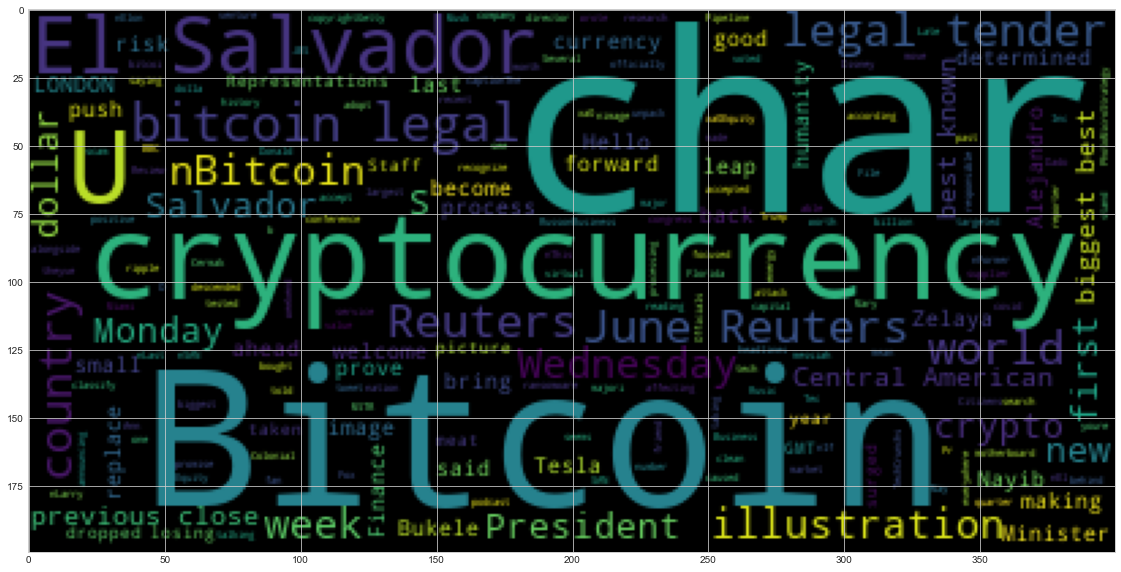

In [33]:
btc_cloud = " ".join(btc_words)
wc = WordCloud().generate(btc_cloud)
plt.imshow(wc)

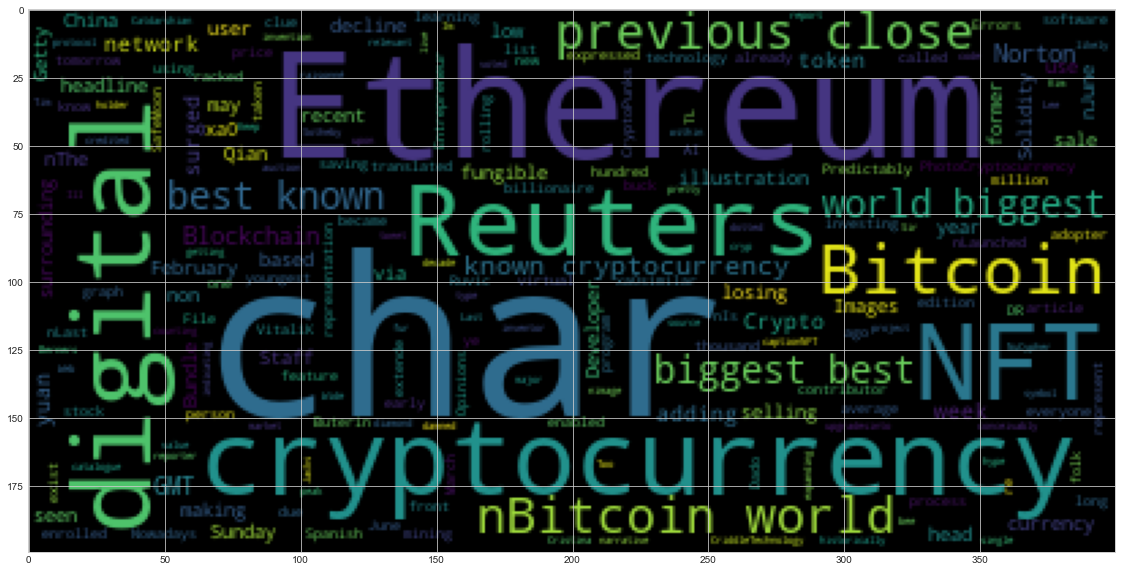

In [34]:
eth_cloud = " ".join(eth_words)
wc = WordCloud().generate(eth_cloud)
plt.imshow(wc)

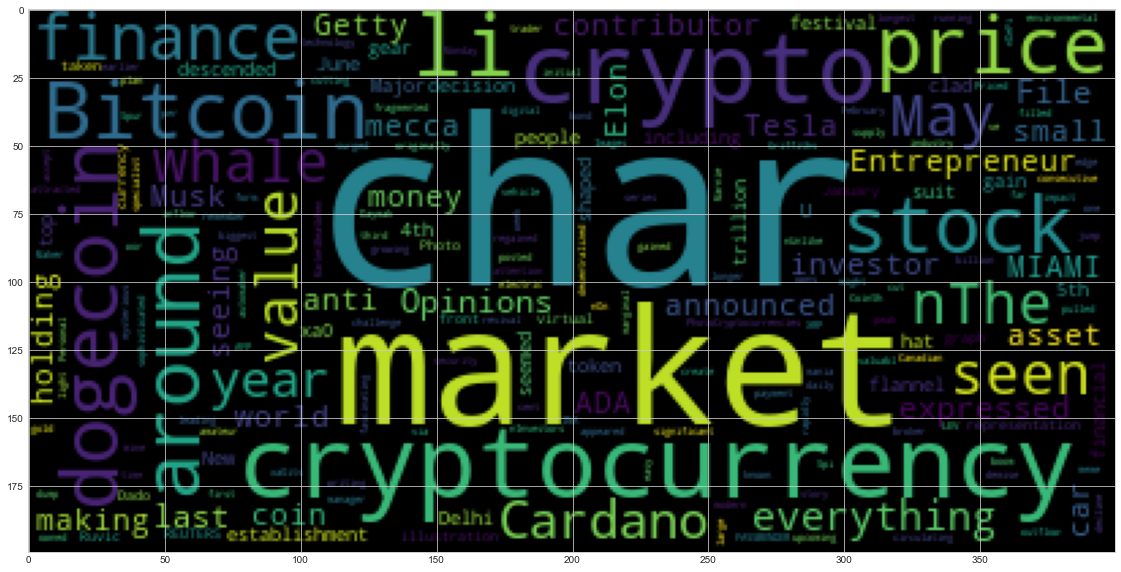

In [35]:
car_cloud = " ".join(car_words)
wc = WordCloud().generate(car_cloud)
plt.imshow(wc)

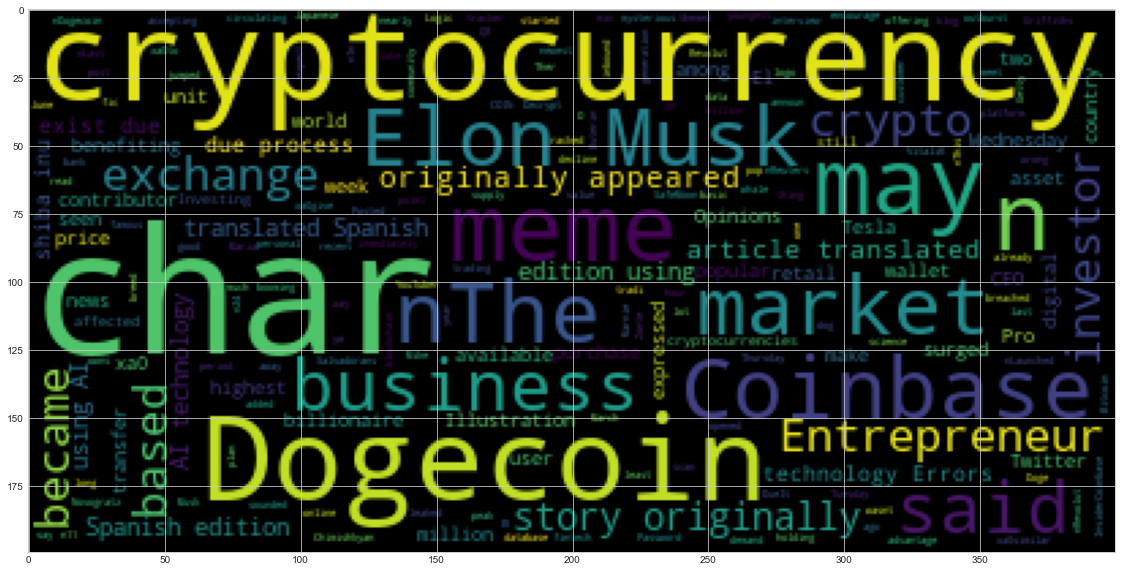

In [36]:
link_cloud = " ".join(link_words)
wc = WordCloud().generate(link_cloud)
plt.imshow(wc)

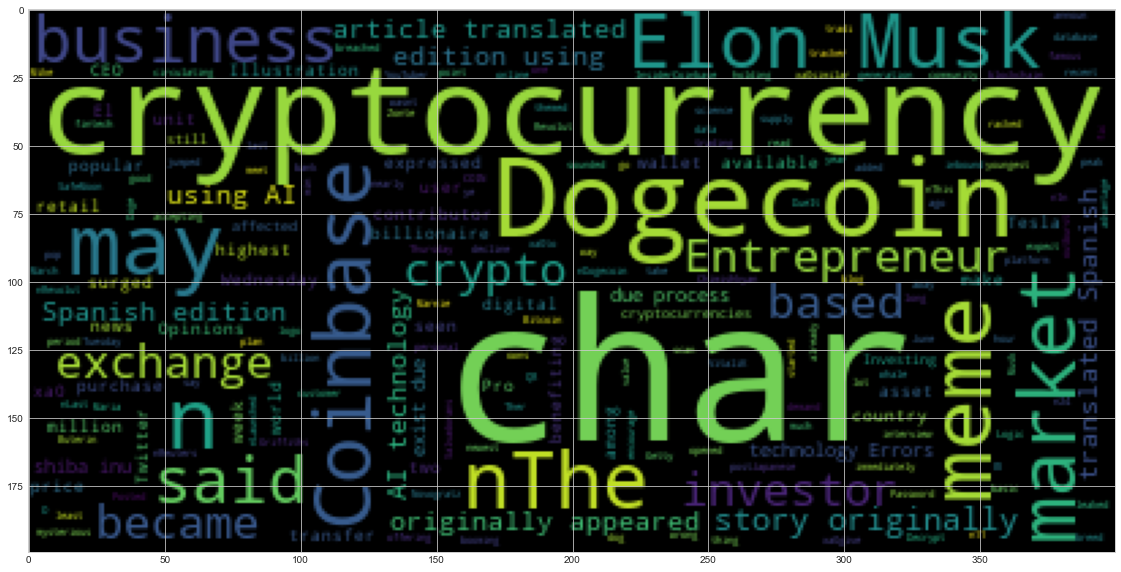

In [37]:
pol_cloud = " ".join(pol_words)
wc = WordCloud().generate(pol_cloud)
plt.imshow(wc)

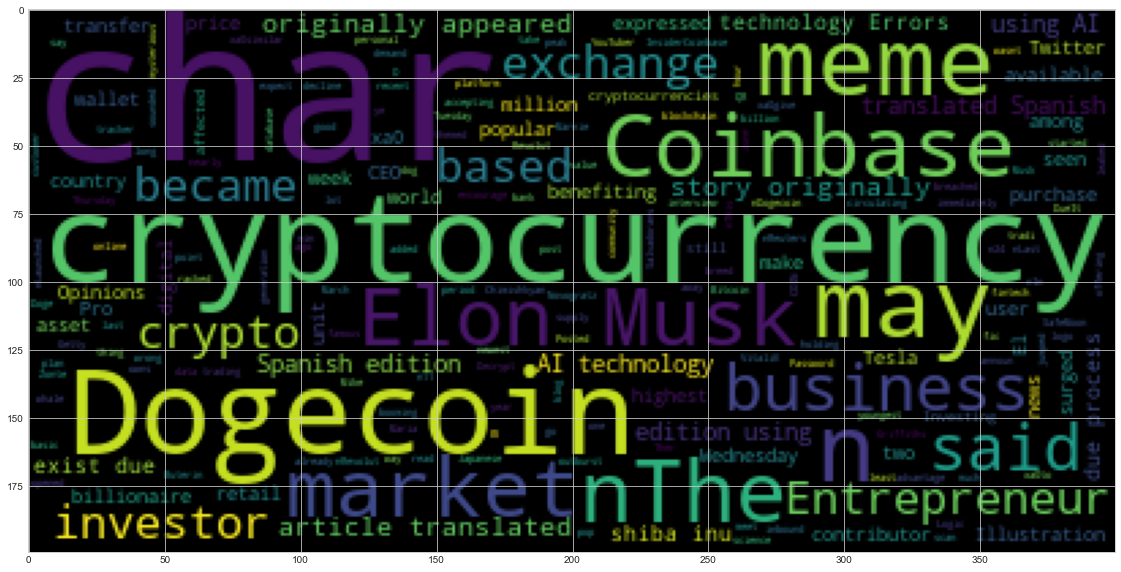

In [38]:
doge_cloud = " ".join(doge_words)
wc = WordCloud().generate(doge_cloud)
plt.imshow(wc)